This file has the code to visualise syllable transition values and create a graph based on it

Date: 20/9/2022

In [86]:
import math
import pandas
import os
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

from networkx.drawing.nx_pydot import write_dot

In [7]:
#set directory
os.chdir('D:\\4th Year\\Semester 7\\BI4313 Sem Project\\IN-comparative-analysis\\IN-comparative-analysis')

In [17]:
file = pandas.read_csv('M09_trans_prob_with_start_procssed.csv', header=None)

#Drop the row and column labels, just keep the numeric values
trans_prob = file.iloc[1:, 1:]
trans_prob = np.array(trans_prob)
trans_prob = trans_prob.astype(float)

#Get the set of unique syllables for the individual with their own index (so convert array to list)
uniq_syl_end = file.iloc[:1, 1:]
uniq_syl_end = np.array(uniq_syl_end)

uniq_syl_start = file.iloc[1:, :1]
uniq_syl_start = np.array(uniq_syl_start)

#print(uniq_syl_end)
#print(uniq_syl_start)

In [88]:
states1 = tuple([tuple(e) for e in uniq_syl_start])
#uniq_syl_start.tolist()
states2 = tuple([tuple(e) for e in uniq_syl_end])
print(states2)
Q = trans_prob

(('i', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'm', 'End', 'n', 'p', 'q', 'r', 's', 'k', 'l'),)


In [87]:
states2 = np.array(uniq_syl_end)

In [92]:
states3 = (('i'), ('a'), ('b'), ('c'), ('d'), ('e'), ('f'), ('g'), ('h'), ('m'), ('St'), ('n'), ('p'), ('q'), ('r'), ('s'), ('k'), ('l'))
states4 = (('i'), ('a'), ('b'), ('c'), ('d'), ('e'), ('f'), ('g'), ('h'), ('m'), ('E'), ('n'), ('p'), ('q'), ('r'), ('s'), ('k'), ('l'))


"{:.02f}".format(rate)

'0.45'

In [93]:
G = nx.MultiDiGraph()
labels={}
edge_labels={}

for i, origin_state in enumerate(states3):
    for j, destination_state in enumerate(states3):
        rate = Q[i][j]
        if rate > 0:
            G.add_edge(origin_state,
                       destination_state,
                       weight=rate,
                       label=rate)
            edge_labels[(origin_state, destination_state)] = label="{:.02f}".format(rate)

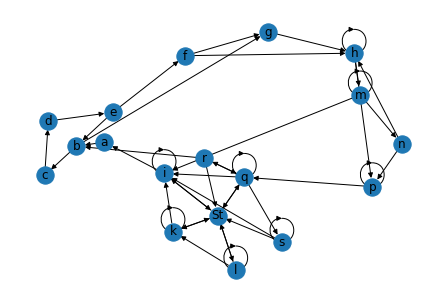

In [99]:
nx.draw(G, with_labels=True)

plt.savefig('M09_nx_temp.png')

TypeError: cannot perform reduce with flexible type

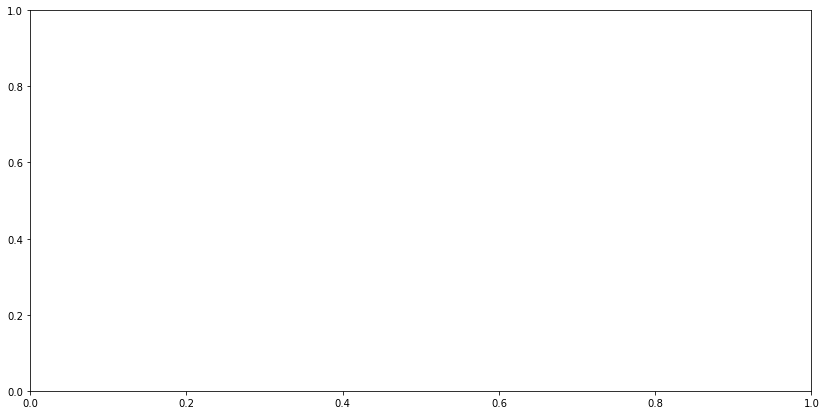

In [63]:
plt.figure(figsize=(14,7))
node_size = 20
pos = {state:list(state) for state in states5}
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_weight=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels)
plt.axis('off')

In [33]:
nx.write_dot(G, 'mc.dot')

AttributeError: module networkx has no attribute write_dot

[['i' 'a' 'b' 'c' 'd' 'e' 'f' 'g' 'h' 'm' 'End' 'n' 'p' 'q' 'r' 's' 'k'
  'l']]
